In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")



In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

def resource_handover_heatmap_2(dfs):
    agents_all = []
    for df in dfs:
        agents_all.extend(df['agent'].unique())
    agents_all = list(set(agents_all))
    agents_all = sorted(agents_all)

    matrices = []
    for df in dfs:
        # Convert end_timestamp to datetime
        if 'end_timestamp' in df.columns:
            df['end_timestamp'] = pd.to_datetime(df['end_timestamp'], format='mixed')
            # Sort DataFrame by end_timestamp
            df = df.sort_values(by=['case_id', 'end_timestamp'])
        else:
            df['end_time'] = pd.to_datetime(df['end_time'], format='mixed')
            # Sort DataFrame by end_timestamp
            df = df.sort_values(by=['case_id', 'end_time'])

        # Group by case_id
        grouped = df.groupby('case_id')

        # Initialize transition count dictionary
        transition_counts = {}

        agent_counts = {agent: 0 for agent in df['agent'].unique()}

        # Iterate over groups
        for _, group in grouped:
            agents = group['agent'].tolist()
            for i in range(len(agents) - 1):
                transition = (agents[i], agents[i+1])
                if transition in transition_counts:
                    transition_counts[transition] += 1
                else:
                    transition_counts[transition] = 1
                agent_counts[agents[i]] += 1

        # Calculate transition probabilities
        total_transitions = sum(transition_counts.values())
        # print(transition_counts)
        
        # Initialize transition probabilities dictionary
        transition_probabilities = {agent_from: {agent_to: 0 for agent_to in agents_all} for agent_from in agents_all}

        # Iterate over transitions
        for transition, count in transition_counts.items():
            agent_from, agent_to = transition
            # if agent_from not in transition_probabilities:
            #     transition_probabilities[agent_from] = {}
            transition_probabilities[agent_from][agent_to] = count / agent_counts[agent_from]
        
        print(transition_probabilities.keys())

        def dict_to_dataframe(input_dict):
            rows = []
            for from_resource, to_dict in input_dict.items():
                for to_resource, prob in to_dict.items():
                    rows.append({'From': from_resource, 'To': to_resource, 'Prob': prob})
            return pd.DataFrame(rows)
        
        freq_df = dict_to_dataframe(transition_probabilities)
        # print(freq_df['Prob'].isna().sum())
        # print(freq_df)
        # freq_df = freq_df.fillna(0)

        # print(freq_df)

        matrix = freq_df.pivot_table(index="From", columns="To", values="Prob").fillna(0)
        matrices.append(matrix)
        # print(matrix)

    # Create the heatmap using Seaborn
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharex=False)

    # plt.figure(figsize=(10, 8))
    sns.heatmap(matrices[0], ax=axes[0], xticklabels=False, yticklabels=False, annot=False, cmap='Reds', fmt="0.1f", cbar=False, vmin=0.0, vmax=1.0)
    sns.heatmap(matrices[1], ax=axes[1], xticklabels=False, yticklabels=False, annot=False, cmap='Reds', fmt="0.1f", cbar=False, vmin=0.0, vmax=1.0)
    sns.heatmap(matrices[2], ax=axes[2], xticklabels=False, yticklabels=False, annot=False, cmap='Reds', fmt="0.1f", cbar=True, vmin=0.0, vmax=1.0)
    # plt.title('Resource Handover Frequency Heatmap')
    axes[0].set_title('As-Is',fontsize=25)
    axes[1].set_title('LC',fontsize=25)
    axes[2].set_title('Optimized',fontsize=25)

    axes[1].set_xlabel('To Resource', fontsize=25)
    axes[0].set_xlabel('', fontsize=25)
    axes[2].set_xlabel('', fontsize=25)
    axes[0].set_ylabel('From Resource', fontsize=25)
    axes[1].set_ylabel('', fontsize=25)
    axes[2].set_ylabel('', fontsize=25)

    # # Add larger axis labels for each subplot
    # for ax in axes:
    #     ax.set_xlabel('To', fontsize=15)
    #     ax.set_ylabel('From', fontsize=15)
    

    plt.savefig(f"LoanApp_junior_senior_transition_probs.pdf", format='pdf', bbox_inches='tight')
    plt.show()

#### LoanApp Junior Senior

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18])
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18])
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18])


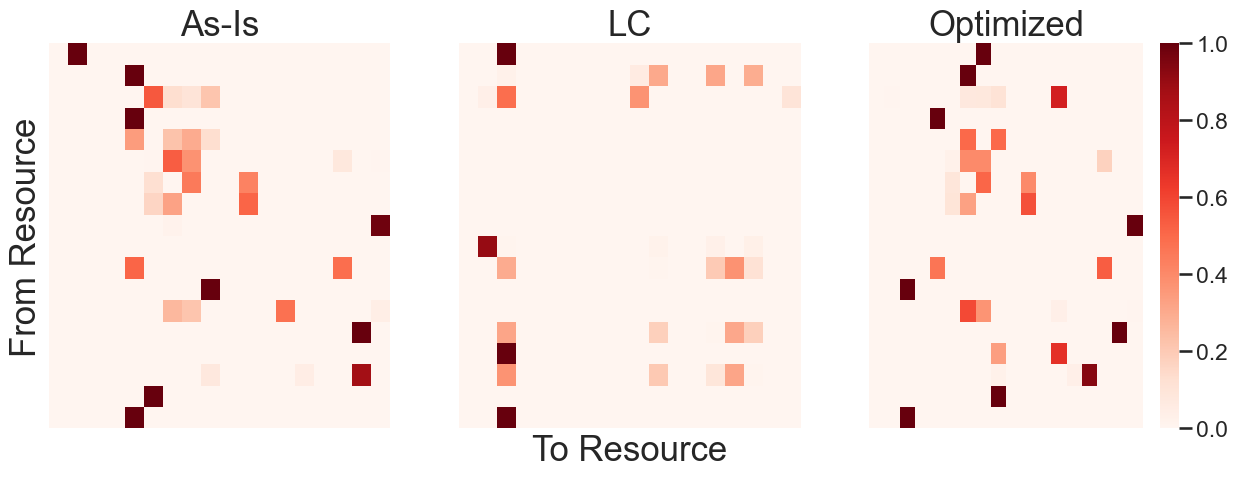

In [42]:
log_asis = pd.read_csv('../simulated_data/LoanApp_junior_senior/autonomous/transition_probs/simulated_log_0.csv')
log_cost = pd.read_csv('../simulated_data/LoanApp_junior_senior/autonomous/cost/simulated_log_0.csv')
log_opt = pd.read_csv('../optimization_runs/LoanApp_junior_senior/pop100_gen100_runs3_config_0.5_20251009-175057/best_balanced_policy_log.csv')

resource_handover_heatmap_2([log_asis, log_cost, log_opt])